<a href="https://colab.research.google.com/github/Liang130520/Deep_Learning/blob/main/00_keras_basic_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
# 了解被分配到的 GPU 及 RAM 性能
!nvidia-smi

Thu Nov 17 06:21:28 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P0    26W /  70W |    996MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [71]:
import tensorflow as tf
from tensorflow.keras import datasets, models, layers, utils, activations, losses, optimizers, metrics

import numpy as np
import matplotlib.pyplot as plt

In [72]:
tf.__version__

'2.9.2'

In [73]:
# Define config
num_classes = 10
img_size = 28

#### Prepare Data

In [74]:
# Load Data from Dataset function
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

# Data shape
# x: (number of samples, H, W)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

(<matplotlib.image.AxesImage at 0x7f40aa75cf10>, 0)

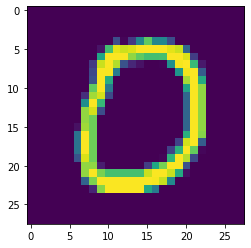

In [75]:
# Show image
idx = 10
plt.imshow(x_test[idx]), y_test[idx]

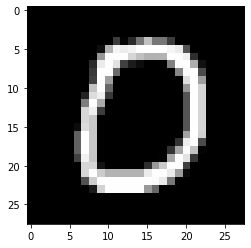

In [76]:
# Show image with grayscale color map
plt.imshow(x_test[idx], cmap=plt.cm.gray)

In [77]:
# Raw value of a image
img = x_test[idx]
print(img.shape, type(img), img.dtype)
print(img)

(28, 28) <class 'numpy.ndarray'> uint8
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  61   3  42 118 193 118 118
   61   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  14 179 245 236 242 254 254 254 254
  245 235  84   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 151 254 254 254 213 192 178 178 180
  254 254 241  46   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  43 235 254 226  64  28  12   0   0   2
  128 252 255 173  17   0   0   0   0   0]
 [  0   0   0   0   0   0

In [78]:
# Flatten(reshape) img to a vector
x_train = x_train.reshape(x_train.shape[0], -1) # (60000, 784)
x_test = x_test.reshape(x_test.shape[0], -1) # (10000, 784)


# Image preprocess: normalize from 0~255 to 0.0~1.0
x_train = x_train / 255.
x_test = x_test / 255.


In [79]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [80]:
# one hot encoding
y_train = utils.to_categorical(y_train, num_classes) # 0, 1, .. 9 -> [1, ...,0, 0,0,0]
y_test = utils.to_categorical(y_test, num_classes)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((60000, 784), (10000, 784), (60000, 10), (10000, 10))

In [81]:
img = x_train[idx]
print('img.shape', img.shape)
print('label (one-hot encoding): ', y_train[idx])
print('label: ', np.argmax(y_train[idx], axis=-1))
print(img)

img.shape (784,)
label (one-hot encoding):  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
label:  3
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.    

#### Build Layer

#### Tensor 張量

In [82]:
inputs = np.random.uniform(0., 1., size=(1, 784)) # shape: (batch size, dims)
linear = layers.Dense(20)
output = linear(inputs) # forward

print(output)

tf.Tensor(
[[ 0.36769378 -0.42318928  0.07727072  1.2135496   0.2577042   0.02420533
  -0.85868484 -0.25713688 -0.14730275 -0.8854132   1.1367097  -0.38844302
   0.22843817  0.02142701 -1.1701939  -0.30341077 -0.9461932   0.15328217
   0.03601623 -1.2026527 ]], shape=(1, 20), dtype=float32)


#### Build Model

In [102]:
# Model 1
def build_model1():
    
    # inputs = layers.Input(shape=(img_size*img_size,)) # input shape (784, )
    inputs = layers.Input(shape=784) # input shape (784)
    x = layers.Dense(units=10, activation='relu')(inputs)
    x = layers.Dense(20, activation=activations.relu)(x)
    prediction = layers.Dense(num_classes, activation='softmax')(x)
    model = models.Model(inputs=inputs, outputs=prediction)

    return model

In [84]:
# Model 2
def build_model2():
    
    model = models.Sequential()
    model.add(layers.Dense(units=10, activation='relu', input_shape=(img_size*img_size,)))
    model.add(layers.Dense(units=20))
    model.add(layers.Activation('relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

In [85]:
# Model 3
def build_model3():
    model = models.Sequential([
        layers.Dense(units=10, activation='relu', input_shape=(img_size*img_size,)),
        layers.Dense(units=20),
        layers.Activation('relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

In [86]:
model = build_model1()
# model = build_model2()
# model = build_model3()

model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_15 (Dense)            (None, 10)                7850      
                                                                 
 dense_16 (Dense)            (None, 20)                220       
                                                                 
 dense_17 (Dense)            (None, 10)                210       
                                                                 
Total params: 8,280
Trainable params: 8,280
Non-trainable params: 0
_________________________________________________________________


In [87]:
# Model 4: Model subclass
class MLP(tf.keras.models.Model):
    def __init__(self):
        super().__init__()
        self.linear_1 = layers.Dense(units=10, activation='relu')
        self.linear_2 = layers.Dense(units=20, activation='relu')
        self.linear_3 = layers.Dense(units=num_classes, activation='softmax')

    def call(self, inputs):
        x = self.linear_1(inputs)
        x = self.linear_2(x)
        return self.linear_3(x)

model = MLP()

In [88]:
inputs = np.random.uniform(0., 1., size=(1, 784)) # shape: (batch size, dims)
output = model(inputs) # shape: (batch size, # of class)

print(output) # tensorflow.Tensor 張量

output_np = output.numpy() # convert tf.Tensor to numpy array

output_np

tf.Tensor(
[[0.09923872 0.09656475 0.0679865  0.1509406  0.07097061 0.11712984
  0.0849001  0.04524611 0.16604817 0.10097459]], shape=(1, 10), dtype=float32)


array([[0.09923872, 0.09656475, 0.0679865 , 0.1509406 , 0.07097061,
        0.11712984, 0.0849001 , 0.04524611, 0.16604817, 0.10097459]],
      dtype=float32)

#### Training

In [89]:
# Method 1 : training from scratch
epochs = 10
batch_size = 128
# Instantiate an optimizer.
optimizer = optimizers.SGD(learning_rate=1e-2)
# Instantiate a loss function.
loss_fn = losses.CategoricalCrossentropy()

# Start training
for epoch in range(epochs):
    print(f'Epoch: {epoch}')

    # Training
    for step, idx in enumerate(range(0, len(x_train), batch_size)):
        # get x, y data
        x_batch = x_train[idx: idx+batch_size]
        y_batch = y_train[idx: idx+batch_size]

        # compute loss
        with tf.GradientTape() as tape:
            pred = model(x_batch) # call 的 function
            loss_value = loss_fn(y_batch, pred)
        # get gradient:計算梯度
        grads = tape.gradient(loss_value, model.trainable_weights)
        # update model
        optimizer.apply_gradients(zip(grads, model.trainable_weights))

        if step % 200 == 0:
            print(f'step : {step} loss: {loss_value}')
    

Epoch: 0
step : 0 loss: 2.3101139068603516
step : 200 loss: 1.7183713912963867
step : 400 loss: 1.1709504127502441
Epoch: 1
step : 0 loss: 1.049494743347168
step : 200 loss: 0.727403998374939
step : 400 loss: 0.744992733001709
Epoch: 2
step : 0 loss: 0.6612613201141357
step : 200 loss: 0.5205773115158081
step : 400 loss: 0.6416330337524414
Epoch: 3
step : 0 loss: 0.5568712949752808
step : 200 loss: 0.4552236795425415
step : 400 loss: 0.5886849164962769
Epoch: 4
step : 0 loss: 0.49122312664985657
step : 200 loss: 0.4155155420303345
step : 400 loss: 0.5491322875022888
Epoch: 5
step : 0 loss: 0.43971535563468933
step : 200 loss: 0.3894658088684082
step : 400 loss: 0.5148085355758667
Epoch: 6
step : 0 loss: 0.3974685072898865
step : 200 loss: 0.36867278814315796
step : 400 loss: 0.4848636984825134
Epoch: 7
step : 0 loss: 0.36248981952667236
step : 200 loss: 0.3505670726299286
step : 400 loss: 0.45940104126930237
Epoch: 8
step : 0 loss: 0.3328583240509033
step : 200 loss: 0.3347859382629394

In [90]:
# Method 2

# Setting for training
model.compile(loss=losses.categorical_crossentropy, # loss function
              # losses.CategoricalCrossentropy(), loss 可替換使用
              optimizer=optimizers.SGD(), # optmizer
              # 'accuracy'是呈現字串形式, tf.keras.metrics.CategoricalAccuracy()有另外的呈現形式
              metrics=['accuracy',
                       tf.keras.metrics.CategoricalAccuracy()]
              )

In [91]:
logs = model.fit(x_train, y_train, # training
                 batch_size=10,
                 epochs=10,
                 validation_data=(x_test, y_test),
                 )

Epoch 1/10
6000/6000 [==============================] - 16s 3ms/step - loss: 0.3313 - accuracy: 0.9035 - categorical_accuracy: 0.9035 - val_loss: 0.2892 - val_accuracy: 0.9151 - val_categorical_accuracy: 0.9151
Epoch 2/10
6000/6000 [==============================] - 16s 3ms/step - loss: 0.2848 - accuracy: 0.9175 - categorical_accuracy: 0.9175 - val_loss: 0.2683 - val_accuracy: 0.9222 - val_categorical_accuracy: 0.9222
Epoch 3/10
6000/6000 [==============================] - 16s 3ms/step - loss: 0.2572 - accuracy: 0.9259 - categorical_accuracy: 0.9259 - val_loss: 0.2652 - val_accuracy: 0.9228 - val_categorical_accuracy: 0.9228
Epoch 4/10
6000/6000 [==============================] - 16s 3ms/step - loss: 0.2380 - accuracy: 0.9304 - categorical_accuracy: 0.9304 - val_loss: 0.2258 - val_accuracy: 0.9345 - val_categorical_accuracy: 0.9345
Epoch 5/10
6000/6000 [==============================] - 16s 3ms/step - loss: 0.2255 - accuracy: 0.9345 - categorical_accuracy: 0.9345 - val_loss: 0.2162 - v

In [92]:
# Model evaluation on test data
score = model.evaluate(x_test, y_test)
print(f'test loss: {score[0]}, test acc: {score[1]}')

313/313 [==============================] - 1s 2ms/step - loss: 0.2081 - accuracy: 0.9385 - categorical_accuracy: 0.9385
test loss: 0.20811256766319275, test acc: 0.9384999871253967


In [103]:
output = model.predict(x_test)
output

313/313 [==============================] - 0s 1ms/step


array([[2.77343846e-04, 2.32706398e-07, 1.58685644e-03, ...,
        9.95910287e-01, 8.94010736e-06, 9.23943153e-05],
       [3.74473757e-07, 2.65687413e-06, 9.98610139e-01, ...,
        2.02726460e-06, 1.40024542e-06, 2.44218599e-13],
       [3.90090063e-05, 9.77870703e-01, 1.26628205e-02, ...,
        2.91457376e-03, 1.55897392e-03, 1.96294623e-05],
       ...,
       [1.18815064e-08, 1.92354534e-07, 2.16874469e-06, ...,
        4.69415936e-05, 8.02478055e-04, 8.21767375e-03],
       [4.11126675e-05, 1.93268056e-06, 3.63715480e-06, ...,
        4.34442349e-08, 6.92030229e-03, 3.17853939e-08],
       [7.94938842e-06, 9.65189484e-10, 2.86383965e-05, ...,
        1.61055239e-10, 7.92366066e-08, 6.56287114e-08]], dtype=float32)

#### Prediction

model.predict(data):np.array 呈現

model(data):tf.Tensor 呈現

In [93]:
# Inference: Get model prediction
start = 0
end = 2
# prediction = model.predict(x_test[start:end]) # (batch size, 784, )
prediction = model(x_test[start:end]) # (batch size, 784, )
print('model prediction: \n', prediction)
print('max probabolity index: \n', np.argmax(prediction, axis=-1))
print('Ground Truth: \n', y_test[start: end], np.argmax(y_test[start: end], axis=-1))

model prediction: 
 tf.Tensor(
[[2.7734385e-04 2.3270640e-07 1.5868564e-03 2.0137536e-03 4.5080859e-09
  1.1022332e-04 4.0999539e-14 9.9591029e-01 8.9401074e-06 9.2394315e-05]
 [3.7447302e-07 2.6568741e-06 9.9861014e-01 1.0301119e-03 2.7707222e-14
  3.5325115e-04 4.5240881e-08 2.0272685e-06 1.4002427e-06 2.4421811e-13]], shape=(2, 10), dtype=float32)
max probabolity index: 
 [7 2]
Ground Truth: 
 [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]] [7 2]


In [94]:
prediction.shape

TensorShape([2, 10])

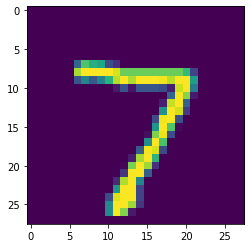

In [95]:
plt.imshow(x_test[0].reshape(img_size, img_size))

In [96]:
history = logs.history
history

{'loss': [0.33126893639564514,
  0.28480762243270874,
  0.25719913840293884,
  0.23796571791172028,
  0.22550536692142487,
  0.2144394814968109,
  0.20660138130187988,
  0.19769911468029022,
  0.1914336085319519,
  0.18572407960891724],
 'accuracy': [0.9034833312034607,
  0.9175333380699158,
  0.9258666634559631,
  0.9303500056266785,
  0.9345166683197021,
  0.9383000135421753,
  0.9390333294868469,
  0.941016674041748,
  0.9430999755859375,
  0.9446666836738586],
 'categorical_accuracy': [0.9034833312034607,
  0.9175333380699158,
  0.9258666634559631,
  0.9303500056266785,
  0.9345166683197021,
  0.9383000135421753,
  0.9390333294868469,
  0.941016674041748,
  0.9430999755859375,
  0.9446666836738586],
 'val_loss': [0.2892044484615326,
  0.26828980445861816,
  0.2651555836200714,
  0.22575852274894714,
  0.21616266667842865,
  0.2160699963569641,
  0.20496098697185516,
  0.2017306089401245,
  0.19800764322280884,
  0.20811262726783752],
 'val_accuracy': [0.9150999784469604,
  0.922200

Text(0.5, 1.0, 'accuracy')

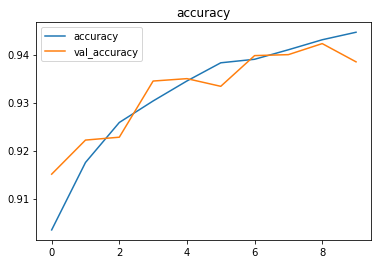

In [97]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('accuracy')

Text(0.5, 1.0, 'loss')

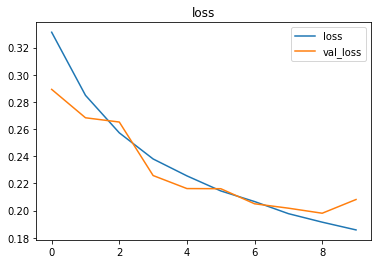

In [98]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('loss')

### Inference

In [99]:
prediction = model(x_test[:1])

In [100]:
prediction.numpy()

array([[2.7734358e-04, 2.3270640e-07, 1.5868534e-03, 2.0137536e-03,
        4.5080948e-09, 1.1022312e-04, 4.0999695e-14, 9.9591029e-01,
        8.9401074e-06, 9.2394490e-05]], dtype=float32)

#### Save & load model

In [ ]:
# Save Whole model:Architecture + Weights + Optimizer
model.save('my_model.h5')
# Load whole model
model2 = tf.keras.models.load_model('my_model.h5')

In [ ]:
# save and load "weights" only
model.save_weights('my_model_weights.h5')

# Rebuild model before load weights !
model = build_model1()

model.load_weights('my_model_weights.h5')